# Amplitude of the anomalous magnetic field

This code illustrates the dependence of the amplitude of the anomalous magnetic field on the magnetization of the sources

### Note

This is an IPython notebook, a document that incorporates text, results, figures, and the Python source code to produce them. If you are viewing this from the URL http://nbviewer.ipython.org/, the document will be static (not executable). To run the code, you will need to download the notebook and install the software required. See the instructions at http://fatiando.github.io/install.html.

These numerical tests use the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://fatiando.org/).

In [1]:
%matplotlib inline
import numpy as np
from IPython.display import Image
from fatiando import gridder
from fatiando.mesher import Prism, PointGrid
from fatiando.gridder import regular
from fatiando.gravmag import prism, sphere
from fatiando.gravmag.eqlayer import EQLTotalField
from fatiando.inversion.regularization import Damping
from fatiando.vis import mpl, myv
from fatiando.utils import ang2vec, gaussian2d
from fatiando.constants import G, CM, T2NT, SI2EOTVOS, SI2MGAL
mpl.rc('font', size=14)

### Synthetic model formed by two rectangular prisms

In [2]:
rho1 = 1000   # density of the smaller prism
m1 = 10       # magnetization intensity of the smaller prism
rho2 = 1000   # density of the greater prism
m2 = 10       # magnetization intensity of the greater prism
incs = 30.0  # magnetization inclination of the sources
decs = -10.0 # magnetization declination of the sources

# Cartesian components of the unitary vector with the
# same direction as the magnetization of the sources
mx, my, mz = ang2vec(1.0, incs, decs)

# magnetic source 1
model = [Prism(16000, 18000, 15000, 17000, 50, 2000, 
               props={'density':rho1, 'magnetization': ang2vec(m1,incs,decs)}),
         Prism(13000, 15000, 16000, 22000, 100, 2100, 
               props={'density':rho2, 'magnetization': ang2vec(m2,incs,decs)})]

# magnetic source 2
model2 = [Prism(16000, 18000, 15000, 17000, 50, 2000, 
               props={'density':rho1, 'magnetization': ang2vec(m1,incs+30.,decs-14.7)}),
         Prism(13000, 15000, 16000, 22000, 100, 2100, 
               props={'density':rho2, 'magnetization': ang2vec(m2,incs-47.1,decs+63.0)})] 

model_projection = []
for i, p in enumerate(model):
    model_projection.append(p.get_bounds()[:4])

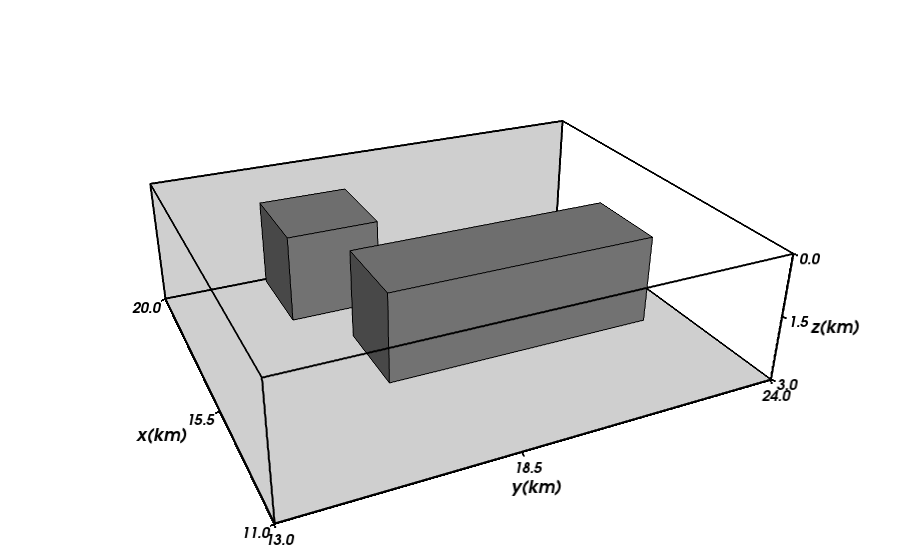

In [3]:
bounds = [11000, 20000, 13000, 24000, 0, 3000]
scene = myv.figure(size=(900, 600))
myv.prisms(model, color=(0.5, 0.5, 0.5), linewidth=1)
ax = myv.axes(myv.outline(extent=bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.1f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x(km)', 'y(km)', 'z(km)'
ax.axes.font_factor = 1.2
myv.wall_north(bounds)
myv.wall_bottom(bounds)

scene.scene.camera.position = [-2974.044752691183, 9596.8491056416624, -9107.8613821350282]
scene.scene.camera.focal_point = [15499.999999999958, 18499.999999999975, 1499.9999999999964]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.4184422264314937, 0.18994873005862808, -0.88815853488449303]
scene.scene.camera.clipping_range = [10100.563022901464, 39493.538959289974]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.savefig('magnetic-source.png')
myv.show()
Image(filename='magnetic-source.png')

Synthetic prisms with constants density and magnetization vector.

### Observation points

In [4]:
#area over which the data are calculated
#x minimum, x maximum, y minimum and y maximum
area = [0, 30000, 5000, 35000] 

#number of data along the y and x directions
shape = (90,90)

#total number of data
N = shape[0]*shape[1]

#grid spacing along the y and x directions
dy, dx = gridder.spacing(area, shape)

#element of area used in the numerical integration
DS = dy*dx

#coordinates x and y of the data
xp, yp = regular(area, shape)

#vertical coordinates of the data
zp = -550. - 700.*gaussian2d(xp, yp, 20000, 10000, 12500, 22500, angle=45)

In [5]:
print 'Grid spacing along the y and x directions'
print 'dx = %.5f m | dy = %.5f m' % (dx,dy)
print 'Element of area used in the numerical integration'
print 'DS = %.2f m**2' % DS

Grid spacing along the y and x directions
dx = 337.07865 m | dy = 337.07865 m
Element of area used in the numerical integration
DS = 113622.02 m**2


In [6]:
print '    maximum  |  minimum'
print 'zp', ' %7.2f  | %7.2f' % (np.max(zp), np.min(zp))

    maximum  |  minimum
zp  -551.31  | -1249.99


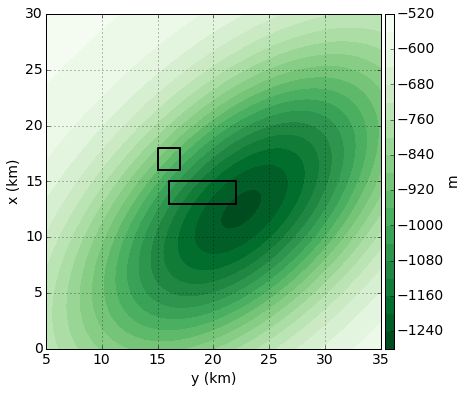

In [7]:
mpl.close('all')
mpl.figure(figsize=(8, 6))
mpl.axis('scaled')
ranges = np.abs([zp.max(), zp.min()]).max()
#mpl.contourf(yp, xp, zp, shape, 20, cmap=mpl.cm.Greys_r, vmin=-ranges, vmax=ranges)
mpl.contourf(yp, xp, zp, shape, 20, cmap=mpl.cm.Greens_r)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('m')
for i, sq in enumerate(model_projection):
    mpl.square(sq, style='-k', linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
#mpl.savefig('data-surface.png', pad_inches=0.0)

Surface containing the calculated amplitude of the anomalous magnetic field.

### Amplitude of the anomalous magnetic field

In [8]:
Bx = prism.bx(xp,yp,zp,model)
By = prism.by(xp,yp,zp,model)
Bz = prism.bz(xp,yp,zp,model)
Amp = np.sqrt(Bx**2 + By**2 + Bz**2)

c:\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


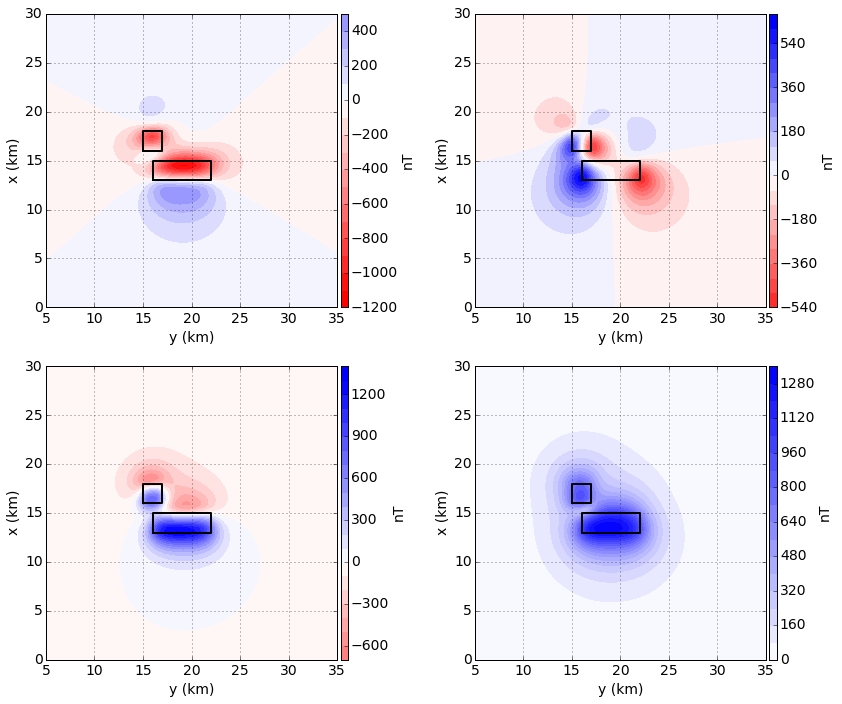

In [9]:
mpl.close('all')
mpl.figure(figsize=(12, 10), tight_layout=True)
mpl.axis('scaled')

mpl.subplot(2,2,1)
ranges = np.abs([Bx.max(), Bx.min()]).max()
mpl.contourf(yp, xp, Bx, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,2)
ranges = np.abs([By.max(), By.min()]).max()
mpl.contourf(yp, xp, By, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,3)
ranges = np.abs([Bz.max(), Bz.min()]).max()
mpl.contourf(yp, xp, Bz, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,4)
ranges = np.abs([Amp.max(), Amp.min()]).max()
mpl.contourf(yp, xp, Amp, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

In [10]:
Bx2 = prism.bx(xp,yp,zp,model2)
By2 = prism.by(xp,yp,zp,model2)
Bz2 = prism.bz(xp,yp,zp,model2)
Amp2 = np.sqrt(Bx2**2 + By2**2 + Bz2**2)

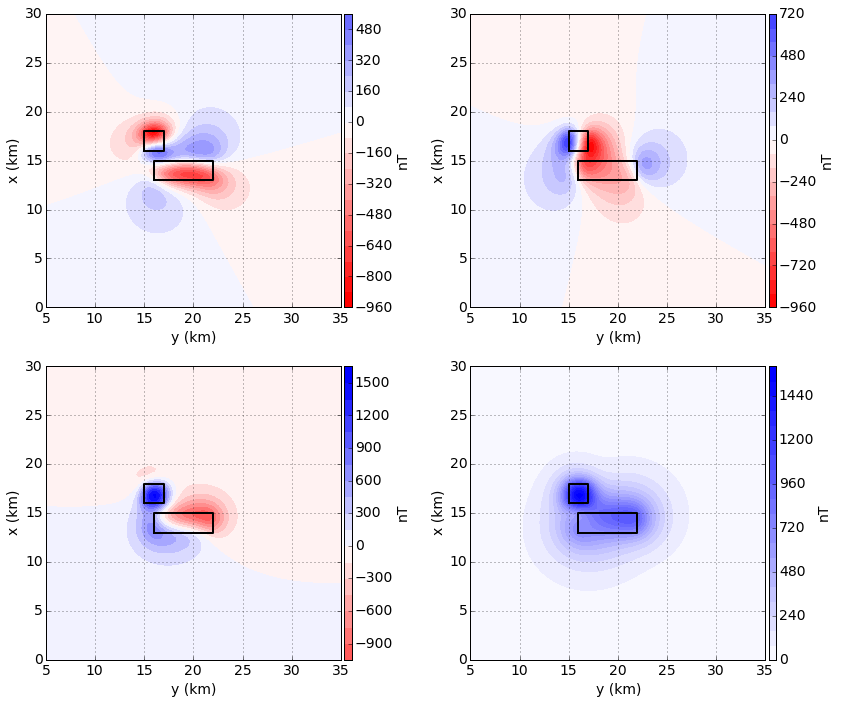

In [11]:
mpl.close('all')
mpl.figure(figsize=(12, 10), tight_layout=True)
mpl.axis('scaled')

mpl.subplot(2,2,1)
ranges = np.abs([Bx2.max(), Bx2.min()]).max()
mpl.contourf(yp, xp, Bx2, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,2)
ranges = np.abs([By2.max(), By2.min()]).max()
mpl.contourf(yp, xp, By2, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,3)
ranges = np.abs([Bz2.max(), Bz2.min()]).max()
mpl.contourf(yp, xp, Bz2, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,4)
ranges = np.abs([Amp2.max(), Amp2.min()]).max()
mpl.contourf(yp, xp, Amp2, shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

### Comparison between the calculates amplitudes

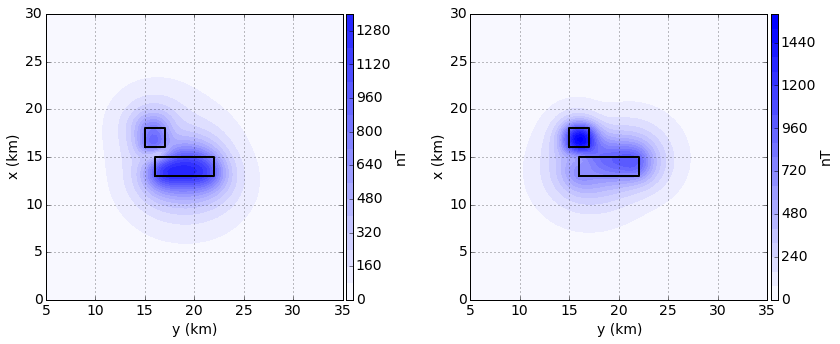

In [12]:
mpl.close('all')
mpl.figure(figsize=(12, 5), tight_layout=True)
mpl.axis('scaled')

ranges = np.abs([Amp.max(), Amp.min(),
                 Amp2.max(), Amp2.min()]).max()

mpl.subplot(1,2,1)
mpl.contourf(yp, xp, Amp, shape, 20, cmap=mpl.cm.bwr_r,
                      vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(1,2,2)
mpl.contourf(yp, xp, Amp2, shape, 20, cmap=mpl.cm.bwr_r,
             vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')